In [ ]:
from skimage import color, exposure, io
import numpy as np

In [ ]:
images = io.imread_collection("image/*.jpg")

In [ ]:
def get_histogram(image, bins_count):
    gray, _ = exposure.histogram(
        color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype"
    )

    return gray


In [1]:
from sklearn import cluster, metrics
import seaborn

ModuleNotFoundError: No module named 'seaborn'

## Varying cluster count

In [ ]:
[histograms[0]]

In [ ]:
histograms = np.array([get_histogram(image, 10) for image in images])

result = []

for i in range(2, 30, 2):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(histograms)
    labels = kmeans.labels_
    result.append([i, metrics.silhouette_score(histograms, labels), kmeans.inertia_])
    print(result[-1])

[2, 0.5750866220417388, 79.04670026209612]
[4, 0.3349341673038641, 37.83292970661778]
[6, 0.34801758377873176, 26.068308896759902]
[8, 0.3070323788007289, 21.659076632400534]
[10, 0.2961448958078744, 18.514487677244137]
[12, 0.2797017398501804, 16.46199055331246]
[14, 0.27747266543362914, 14.80388025556765]
[16, 0.2640298713281567, 13.549592566159468]
[18, 0.27391610740145084, 12.369355373763986]
[20, 0.27396632525903203, 11.642632953664899]
[22, 0.26256994946350887, 10.88149153606194]
[24, 0.2624607492299714, 10.1885926836916]
[26, 0.2809717816981347, 9.573612688714725]
[28, 0.26023250072375803, 9.1656891333157]


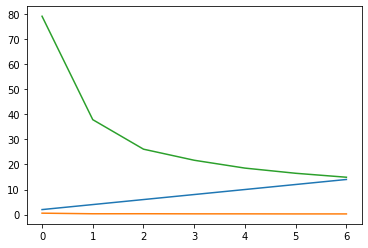

In [ ]:
plt.plot(result)
# TODO: plot is better

## Varying bin count

In [ ]:
for i in range(2, 20, 2):
    histograms = np.array([get_histogram(image, 10) for image in images])
    kmeans = cluster.KMeans(n_clusters=10)
    kmeans.fit(histograms)
    labels = kmeans.labels_
    print(i, metrics.silhouette_score(histograms, labels), kmeans.inertia_)

2 0.29402508959794477 18.56230401750335
4 0.3000625022722013 18.50939313651213
6 0.30077429337903394 18.49434694027593
8 0.29663451634496096 18.51033454511588
10 0.3002637027607097 18.50847662391722
12 0.29780221923832834 18.513036621590903
14 0.30136825586879373 18.522679246238244
16 0.30152531705352514 18.52136248445165
18 0.3025146177678809 18.56125019245344
